# Quantum Computing Work Book

Complex Numbers and linear algebra using Julia, b/c it's just better[1]

[1] Personal opinion

In [8]:
using Symbolics, LinearAlgebra, CairoMakie
import Printf.@printf

These import statements can take a while, especially the CairoMakie one. It has to precompile as much of the library as it can. The first run takes a while, but afterwards it runs very very quickly.

### A Quick Note on Julia's Print Functions

`print()` does not include a newline like python's does

`println()` does.

Neither function automatically pretty prints Matrices.

`display()` is a function that can handle showing more than just text,
and adapts to whatever environment you are running the code in. This
function does pretty print matrices. However, at least in VSCode, the
print and display messages are one seperate channels, and thus they 
show up out of order. As a result, it is difficult to print the arrays
and their annotations. I choose to just display the matrices, and comment the code

`@printf` is great for printing formatted numbers. The @ is there because this is a macro, and expands to some other code at runtime. it allows c like format strings.

In [9]:
# Complex numbers are built right into Julia
a = 1+2im
b = 3+4im
println(a,", ",b) # Print function doesn't automatically add spaces

1 + 2im, 3 + 4im


In [10]:
# All common operations are defined (and shorter to type)
println(a+b)
println(a-b)
println(a*b)
println(a/b)
println(real(a))
println(imag(a))
println(conj(a))

4 + 6im
-2 - 2im
-5 + 10im
0.44 + 0.08im


1
2
1 - 2im


In [11]:
print(angle(a), " ", abs(a))

1.1071487177940904 2.23606797749979

In [12]:
# The original code didn't use this roots array, (chatgpt bug?)
# I changed it so it did. Also removed normalizing step
roots = []
c = 3+2im
# Julia range notation is compact, and is end inclusive
for i in 1:10
    croot = c^(1/i)
    @printf("root =%d, angle =%0.5f,   magnitude =%0.5f,   cartesian =%0.3f + %0.3f im\n",
        i, angle(croot), abs(croot), real(croot), imag(croot))
    push!(roots, croot)
end

root =1, angle =0.58800,   magnitude =3.60555,   cartesian =3.000 + 2.000 im
root =2, angle =0.29400,   magnitude =1.89883,   cartesian =1.817 + 0.550 im
root =3, angle =0.19600,   magnitude =1.53341,   cartesian =1.504 + 0.299 im
root =4, angle =0.14700,   magnitude =1.37798,   cartesian =1.363 + 0.202 im
root =5, angle =0.11760,   magnitude =1.29239,   cartesian =1.283 + 0.152 im
root =6, angle =0.09800,   magnitude =1.23831,   cartesian =1.232 + 0.121 im
root =7, angle =0.08400,   magnitude =1.20107,   cartesian =1.197 + 0.101 im
root =8, angle =0.07350,   magnitude =1.17387,   cartesian =1.171 + 0.086 im
root =9, angle =0.06533,   magnitude =1.15315,   cartesian =1.151 + 0.075 im
root =10, angle =0.05880,   magnitude =1.13683,   cartesian =1.135 + 0.067 im


### A Quick Note on Plotting in Julia with Makie

You want plots like matplotlib and pyplot? Go use Plots.jl. It's slower, but literally just uses matplot as a backend.

Makie is more julia native, and faster, and I like the syntax better. However unlike pyplot it doesn't use as much global state, and requires you to specify what plot objects you are operating on (generally). So there's a little more boiler plate to get a plot going.

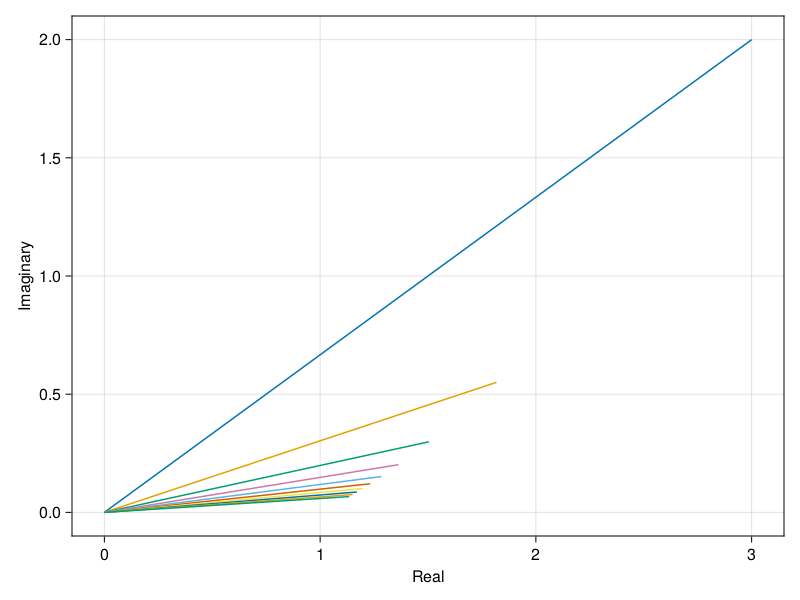

In [13]:
f = Figure() # create figure
ax = Axis(f[1,1]) # Place axis in figure
for root in roots # use the roots from the last step
    x = real(root)
    y = imag(root)
    lines!(ax, [0,x], [0,y])
end
ax.xlabel = "Real" # Makie also has function like syntax for setting
ax.ylabel = "Imaginary" # these values.
display(f)

## The Many nth Complex Roots

Below is the 5th root of one

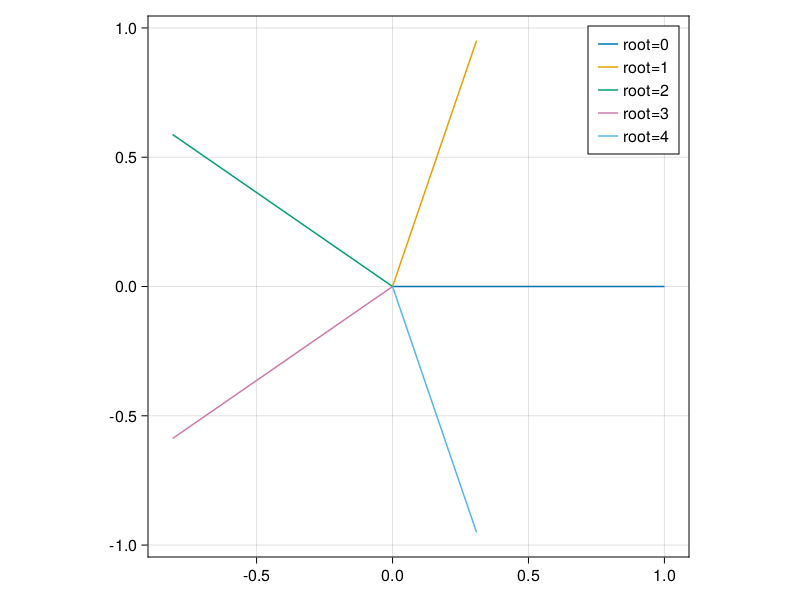

root = 0  angle =  0.00  abs =1.00  real =1.00  imag =0.00
root = 1  angle =  1.26  abs =1.00  real =0.31  imag =0.95
root = 2  angle =  2.51  abs =1.00  real =-0.81  imag =0.59
root = 3  angle = -2.51  abs =1.00  real =-0.81  imag =-0.59
root = 4  angle = -1.26  abs =1.00  real =0.31  imag =-0.95


In [14]:
# Create the figure and axis, force it to be square
f = Figure()
ax = Axis(f[1,1], aspect=AxisAspect(1))

n_roots = 5
for k in 0:n_roots-1
    c = exp(im*2*pi*k/n_roots)
    x = real(c)
    y = imag(c)
    lines!(ax, [0,x], [0,y], label="root=$(k)")
    @printf("root =%2d  angle =%6.2f  abs =%.2f  real =%3.2f  imag =%3.2f\n",
        k, angle(c), abs(c), x, y)
end

axislegend()
display(f)

## Matrix Basics In Julia

I break up some of these blocks so that it's easier to see the output

In [15]:
# Matrices are built into Julia, no need for numpy constructors!
# That also means that they play nice with all default operators,
# No need for methods from a seperate library (*cough* matmul *cough*)

A = [1 2
     3 4]
display(A)

# random real matrix integer
A = rand(-9:9, (4,4))
display(A)

2×2 Matrix{Int64}:
 1  2
 3  4

4×4 Matrix{Int64}:
 4   2   6  -8
 6   1  -9   5
 7   1   7  -2
 9  -5   4   3

In [16]:
# simple vector
# IMPORTANT: Julia vectors are always treated as columns
# And can be used as a nx1 matrix in any operation
vsimple = rand(-9:9, 4)
display(vsimple)

# eplicit column vector
vcol = rand(-9:9, (4,1))
display(vcol)

# explicit row vector
vrow = rand(-9:9, (1,4))
display(vrow)

println("Julia vectors are treated as column vectors")

4-element Vector{Int64}:
 -5
  2
  5
  7

4×1 Matrix{Int64}:
 0
 8
 4
 8

1×4 Matrix{Int64}:
 -7  -8  -8  8

Julia vectors are treated as column vectors


In [17]:
# Vector products

# Random int matrix
A = rand(-9:9, (4,4))
display(A)

# Make the other vectors
vsimple = rand(-9:9, 4)
vcol = reshape(vsimple, (4,1))
vrow = reshape(vsimple, (1,4))
display(vsimple)
display(vcol)
display(vrow)

4×4 Matrix{Int64}:
  1   4   5   5
 -4  -2  -1  -3
 -4   1  -4  -4
 -6  -9   5  -7

4-element Vector{Int64}:
  2
 -7
  5
  7

4×1 Matrix{Int64}:
  2
 -7
  5
  7

1×4 Matrix{Int64}:
 2  -7  5  7

In [18]:
# Dot of two vectors. type : "\cdot{TAB}" to get the
# unicode for the dot operation in a supported ide
display(dot(vsimple,vsimple))
display(vsimple ⋅ vsimple)

127

127

In [19]:
# Multiplication defaults to matrix multiplication
# Wouldn't it be so silly if it defaulted to element wise multiplication? 
display(vsimple * vsimple')
# ' is the adjoint operator. in the absence of complex numbers,
# it's a handy way to quickly transpose a matrix. You can also use
# `transpose` to not conjugate complex numbers in the process.

# element by element multiplication
display(vsimple .* vsimple)

4×4 Matrix{Int64}:
   4  -14   10   14
 -14   49  -35  -49
  10  -35   25   35
  14  -49   35   49

4-element Vector{Int64}:
  4
 49
 25
 49

In [20]:
# Matrix multiplications
display(A * vsimple)

display(A * vcol)

display(vrow * A)

4-element Vector{Int64}:
  34
 -20
 -63
  27

4×1 Matrix{Int64}:
  34
 -20
 -63
  27

1×4 Matrix{Int64}:
 -32  -36  32  -38

## Generating Commonly Used Matricees

In [21]:
# Identity Matrix
display(Matrix(I,4,4))
display(I) # Most applications of the identity matrix don't actually
           # require the matrix to be instantiated. The constant I
           # will work with any dimension matrix, and takes less mem.

display(zeros(4,4))

display(ones(4,4))

4×4 Matrix{Bool}:
 1  0  0  0
 0  1  0  0
 0  0  1  0
 0  0  0  1

UniformScaling{Bool}
true*I

4×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

4×4 Matrix{Float64}:
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0

In [22]:
# Random float 0-1
display(rand(4,4))

# Random int -9 - 9
display(rand(-9:9, 4, 4))

# Random Complex number, 0-1 
display(rand(Complex{Float64}, 4,4))

# Random Complex number, transformed to range -9 - 9
display(18*rand(Complex{Float64}, 4,4) .- Complex(9,9))

4×4 Matrix{Float64}:
 0.966069  0.37743   0.0244888  0.224152
 0.55834   0.332134  0.878266   0.567867
 0.286213  0.103125  0.670422   0.447396
 0.247408  0.229509  0.197292   0.582403

4×4 Matrix{Int64}:
  4  1   8  -1
 -7  7  -5  -2
  9  5   3   8
 -9  7  -2  -6

4×4 Matrix{ComplexF64}:
 0.352704+0.182366im  0.657421+0.210648im  …   0.66929+0.338598im
 0.659601+0.134385im  0.425124+0.687431im     0.773934+0.422893im
 0.917732+0.826756im  0.333096+0.974775im     0.261397+0.30342im
 0.184726+0.404555im  0.527197+0.575208im     0.422615+0.467444im

4×4 Matrix{ComplexF64}:
 1.26293-2.07482im   -3.91503-0.539523im  …   7.87449+1.03441im
 1.00069-8.93837im    8.40758+2.81263im       6.19183+7.90898im
 2.45671-0.828757im  -3.95288-6.10577im       -4.7011-1.43454im
 1.64767+5.26863im    -6.4731+6.24965im      -4.99809-2.9986im

## Special Matrix Operations

In [23]:
display(inv(A))

display(det(A))

4×4 Matrix{Float64}:
 -0.0962343  -0.527197   0.121339   0.0878661
  0.117155   -0.401674   0.330544   0.0669456
  0.112971   -0.3159     0.140167   0.135983
  0.0125523   0.742678  -0.42887   -0.207113

478.0

In [24]:
# returns values and vecs
display(eigen(A))
# only values
display(eigvals(A))
# only vecs
display(eigvecs(A))
# Other useful functions:
# eigmax(A)
# eigmin(A)
# will fail on complex values, since they can't be sorted

Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
4-element Vector{ComplexF64}:
 -4.3256916156313885 - 6.431268624067136im
 -4.3256916156313885 + 6.431268624067136im
 -1.6743083843686106 - 2.2701762937270415im
 -1.6743083843686106 + 2.2701762937270415im
vectors:
4×4 Matrix{ComplexF64}:
 -0.681463-0.0im       -0.681463+0.0im       …   0.584726-0.136581im
  0.146996+0.263326im   0.146996-0.263326im      0.155889+0.308053im
  0.225286+0.219917im   0.225286-0.219917im         0.282+0.0920953im
   0.38297+0.445956im    0.38297-0.445956im     -0.657447+0.0im

4-element Vector{ComplexF64}:
 -4.3256916156313885 - 6.431268624067136im
 -4.3256916156313885 + 6.431268624067136im
 -1.6743083843686106 - 2.2701762937270415im
 -1.6743083843686106 + 2.2701762937270415im

4×4 Matrix{ComplexF64}:
 -0.681463-0.0im       -0.681463+0.0im       …   0.584726-0.136581im
  0.146996+0.263326im   0.146996-0.263326im      0.155889+0.308053im
  0.225286+0.219917im   0.225286-0.219917im         0.282+0.0920953im
   0.38297+0.445956im    0.38297-0.445956im     -0.657447+0.0im

In [25]:
display(svd(A))

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
4×4 Matrix{Float64}:
 -0.362763   0.577269  0.731024    0.0277052
  0.319158  -0.191085  0.341979   -0.862946
  0.22635   -0.626634  0.589869    0.456234
  0.845758   0.487418  0.0266342   0.215425
singular values:
4-element Vector{Float64}:
 15.535329064546316
  8.781050976022808
  4.226016505439913
  0.8291435994451783
Vt factor:
4×4 Matrix{Float64}:
 -0.490453  -0.60989   0.0766262  -0.617753
  0.105186  -0.26445   0.913451    0.290878
 -0.746844   0.612941  0.257177    0.0197029
  0.436597   0.427088  0.305935   -0.730331

In [26]:
# Solve
A \ vsimple

4-element Vector{Float64}:
  4.7196652719665275
  5.167364016736401
  4.089958158995816
 -8.767782426778242

## A Note on Singular Value Decomposition

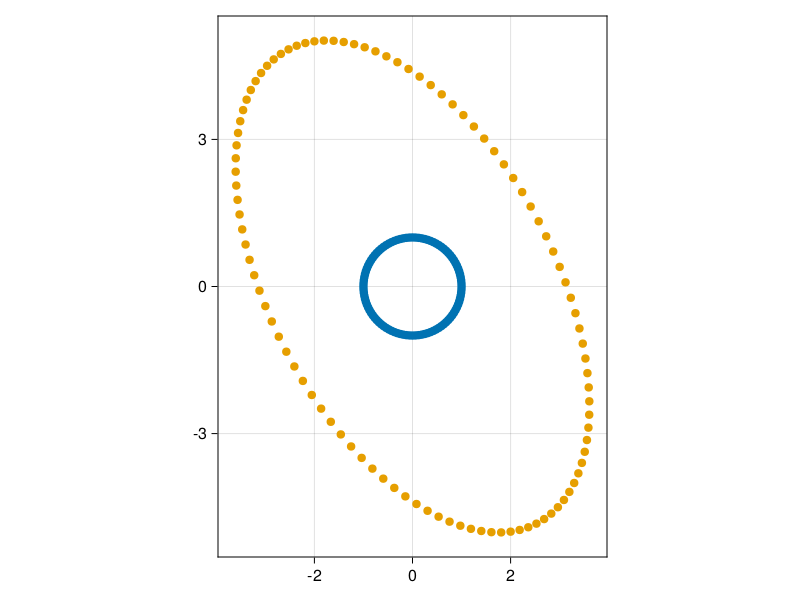

In [27]:
A = [3 -2
    0.4 5]

N = 100
θ = (1:N)*2*π/N # Create range over 0 - 2pi
xy = [cos.(θ) sin.(θ)] # Build xy array applying func to range
xyt = (A * xy')' # transpose, transform, retranspose
# This is done b/c x is a column, and y is a column, 
# but to replicate transformation by applying matmul(A, [xi, yi]),
# x needs to be the first row, and y the next. So we transpose then multiply
# and transpose back to keep that nice column major storage

f = Figure()
ax = Axis(f[1,1], aspect=DataAspect())
scatter!(ax, xy[:,1], xy[:,2])
scatter!(ax, xyt[:,1], xyt[:,2])
display(f)

### Singular Values are the semi-major and semi-minor axes for this transformed unit circle

In [28]:
S, V, D = svd(A)

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
2×2 Matrix{Float64}:
 -0.464526  0.88556
  0.88556   0.464526
singular values:
2-element Vector{Float64}:
 5.45674745105079
 2.8954977560776505
Vt factor:
2×2 Matrix{Float64}:
 -0.190471  0.981693
  0.981693  0.190471

### S and D are rotations and transformations of the matrix before and after scaling. These are unitary matrices

In [29]:
# There was an error in Dr. Wallin's notebook, should be S and D,
# Not D multiplied twice
display(S * S')
display(D * D')

2×2 Matrix{Float64}:
  1.0          -5.55112e-17
 -5.55112e-17   1.0

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0

## Linear Spaces

In [31]:
# Solve Ax + b
A = rand(-9:9, 3, 3)
display(A)

b = rand(-9:9, 3)
display(b)

# backslash is a polyalgorithm that does an optimized
# linear solve based on the special type of A (symm, tridiag, etc.)
x = A \ b
display(x)

# A check
display(A * x)

3×3 Matrix{Int64}:
  2  6  -7
  4  5   5
 -3  9   8

3-element Vector{Int64}:
 -8
 -9
 -6

3-element Vector{Float64}:
 -1.0
 -1.0
 -2.3992107735543635e-17

3-element Vector{Float64}:
 -8.0
 -9.0
 -6.0

In [32]:
# Now multiply column vectors by the x elements
# This is just a repeat of a matrix multiplication, so
# I'm going to skip it.

## Complex Vector Spaces

In [42]:
function gen_complex_vec(n)
    return [Complex(row...) for row in eachrow(rand(-9:9, n, 2))]
end

function print_complex_vec(v)
    for c in v
        println(c)
    end
    println()
end

print_complex_vec (generic function with 1 method)

In [45]:
a = gen_complex_vec(4)
b = gen_complex_vec(4)

print_complex_vec(a)
print_complex_vec(b)
print_complex_vec(a + b)

5 + 8im
9 + 9im
-5 - 7im
-4 + 9im

-7 + 7im
6 + 3im
8 - 6im
-5 - 4im

-2 + 15im
15 + 12im
3 - 13im
-9 + 5im



## Inner and Outer Products

In [50]:
inner = a ⋅ b
display(inner)

outer = a * transpose(b) # have to explicitly use transpose, not ' adjoint
display(outer)

element_wise = a .* b
display(element_wise)

88 + 211im

4×4 Matrix{Complex{Int64}}:
  -91-21im    6+63im   88+34im   7-60im
 -126+0im    27+81im  126+18im  -9-81im
   84+14im   -9-57im  -82-26im  -3+55im
  -35-91im  -51+42im   22+96im  56-29im

4-element Vector{Complex{Int64}}:
 -91 - 21im
  27 + 81im
 -82 - 26im
  56 - 29im

## Matrix Adjoint and Multiplication

In [51]:
A = outer
display(A)

Aconj = conj(A)
display(Aconj)

Aadj = A'
display(Aadj)

4×4 Matrix{Complex{Int64}}:
  -91-21im    6+63im   88+34im   7-60im
 -126+0im    27+81im  126+18im  -9-81im
   84+14im   -9-57im  -82-26im  -3+55im
  -35-91im  -51+42im   22+96im  56-29im

4×4 Matrix{Complex{Int64}}:
  -91+21im    6-63im   88-34im   7+60im
 -126+0im    27-81im  126-18im  -9+81im
   84-14im   -9+57im  -82+26im  -3-55im
  -35+91im  -51-42im   22-96im  56+29im

4×4 adjoint(::Matrix{Complex{Int64}}) with eltype Complex{Int64}:
 -91+21im  -126+0im    84-14im  -35+91im
   6-63im    27-81im   -9+57im  -51-42im
  88-34im   126-18im  -82+26im   22-96im
   7+60im    -9+81im   -3-55im   56+29im

## Matrix Multiplication in Numpy

In [54]:
A = rand(-9:9, 3, 3) + im*rand(-9:9, 3, 3)
B = rand(-9:9, 3, 3) + im*rand(-9:9, 3, 3)

display(A)
display(B)

C = A * B
display(C)

element_wise = A .* B
display(element_wise)

3×3 Matrix{Complex{Int64}}:
 -9+9im  -5+6im   3-4im
  5-6im   1+3im  -3+7im
 -2+1im  -7-8im  -8+8im

3×3 Matrix{Complex{Int64}}:
 2+7im   5-4im  -6-1im
 0-7im  -7-9im   2-6im
 3+2im   9+9im   4+6im

3×3 Matrix{Complex{Int64}}:
  -22-16im   143+75im    125-1im
   50+31im   -69-44im    -70+41im
 -107+45im  -173+132im  -129+6im

3×3 Matrix{Complex{Int64}}:
 -81-45im  -1+50im   -22+21im
 -42-35im  20-30im    36+32im
  -8-1im    9-135im  -80-16im

Skip the hard way to do matrix multiply

## Ranks

In [59]:
function lower_rank(n)
    A = rand(-9:9, n, n) + im*rand(-9:9, n, n)
    A[n,:] = A[1,:]*2
    return A
end

D = lower_rank(3)
display(D)

rank(D)

3×3 Matrix{Complex{Int64}}:
 -4-1im   4+1im   6+4im
  6+9im  -3-4im  -1-1im
 -8-2im   8+2im  12+8im

2

## Linear Solves with different ranks

In [65]:
A = rand(-9:9, 3, 3) + im*rand(-9:9, 3, 3)
println("det A: $(det(A))")
println("rank A: $(rank(A))")

b = rand(-9:9, 3) + im*rand(-9:9, 3)

println("Solution: \n$( A \ b )")

b = rand(-9:9, 3)

println("Solution: \n$( A \ b )")

det A: 208.0000000000001 - 242.00000000000014im
rank A: 3
Solution: 
ComplexF64[-0.3100129630357068 + 0.9854656872373013im, -2.603566798915817 - 0.42338060258475035im, -1.8176925796441044 + 0.5871076717602225im]
Solution: 
ComplexF64[-0.08838433436775711 - 0.006677927485564054im, -0.6827198805829431 - 1.140472168755155im, -1.2675884825391828 - 0.811328907569627im]


In [67]:
# Now with defficient ranks
A = lower_rank(3)
println("det A: $(det(A))")
println("rank A: $(rank(A))")

b = rand(-9:9, 3)

println("Solution: \n$(A \ b)")

det A: 0.0 + 0.0im
rank A: 2

SingularException: SingularException(3)